In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Networkx

Networkx is a Python library people commonly use when dealing with graphs. Please follow the instructions to install the package: https://networkx.org/documentation/stable/install.html. A tutorial for quick-start is also available on their webpage: https://networkx.org/documentation/stable/tutorial.html.





# $G(n,p)$

This notebook aims to empirically investigate the properties of Erdős-Rényi graphs, specifically the $G(n,p)$ model, and compare them with real-world networks. Networkx provides a convenient way to generate random graphs using built-in functions for various commonly used graph models. To create an Erdős-Rényi graph, we can use the function `nx.erdos_renyi_graph(n, p)`, where `n` is the number of nodes and `p` is the probability of an edge between two nodes. The function returns an `nx.Graph` object containing the nodes and edges of the generated graph.


10 4


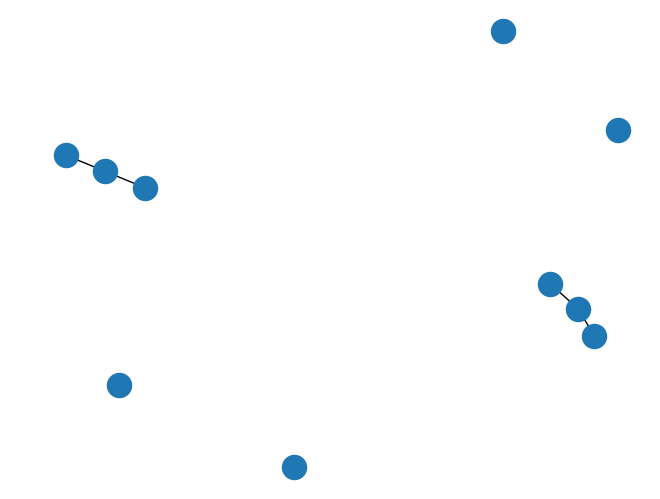

In [2]:
# Example: generate a graph from G(10, 0.1)
G_test = nx.erdos_renyi_graph(10, 0.1)
# Check how many nodes and edges it has.
print(G_test.number_of_nodes(), G_test.number_of_edges())
# Plot the graph
nx.draw(G_test)

## Statistics of $G(n,p)$ (20 pts)

In the upcoming code cell, you will be requested to generate graphs from $G(n,p)$ model with $n$ set to 100, using different values of $p$ ranging from 0.001 to 0.081, with a small step size such as 0.005. For each value of $p$, you should generate 10 graph samples from the model and report the average of the following graph statistics with error bars for std. We also provide a brief explanation on how to compute these statistics using networkx functions:

- Number of edges: To obtain the number of edges in a given nx.graph object G, you can utilize the function `G.number_of_edges()`.

- Number of triangles: Using `nx.triangles(G)`, a dictionary of (node id, number of triangles participated) key-value pairs is returned. To calculate the total number of triangles in G, simply sum all the values in the dictionary and divide the result by 3 (since each triangle is counted three times in the dictionary).

- Number of isolated nodes: If a node has degree 0, then it is an isolated node. The function G.degree is a map-like object consisting of (node id, node degree) pairs. To count the number of isolated nodes, iterate through `G.degree` and count the number of 0s in the values.

- Number of connected components: In graph theory, a connected component is a set of vertices in a graph that are linked to each other by paths. Using nx.connected_components(G), a node list generator is returned, which yields one component at a time. To get the total number of connected components, you can use `len(list(nx.connected_components(G)))`.

For each graph statistic, generate a plot where the x-axis represents the values of $p$, and the y-axis represents the average of the statistic. 

In [4]:
# Write your code below
G_test = []
p = [0.001]+[.001+(.005*i) for i in range(int((.08)/.005))]
for pi in p:
    G_test.append([nx.erdos_renyi_graph(100, pi) for i in range(len(p))])

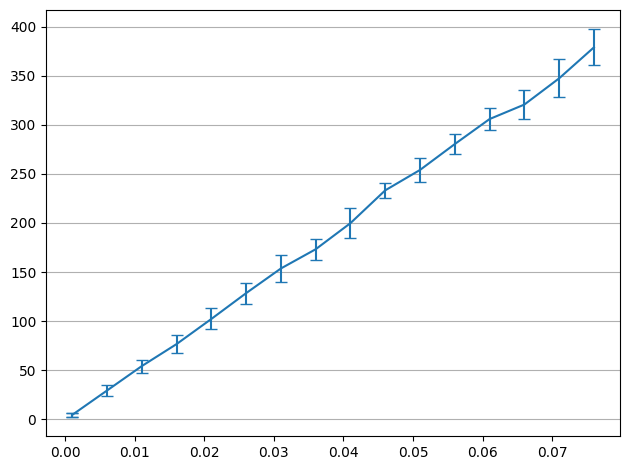

In [5]:
# Generate plot with error bars for number of edges.
import matplotlib.pyplot as plt

x = [[g.number_of_edges() for g in G_test[i]] for i in range(len(p))]

temp = [np.asarray(x[i]) for i in range(len(p))]
mean = [np.mean(temp[i]) for i in range(len(p))]
std = [np.std(temp[i]) for i in range(len(p))]
fig, ax = plt.subplots()
ax.errorbar(p, mean, yerr=std,capsize=4)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show()

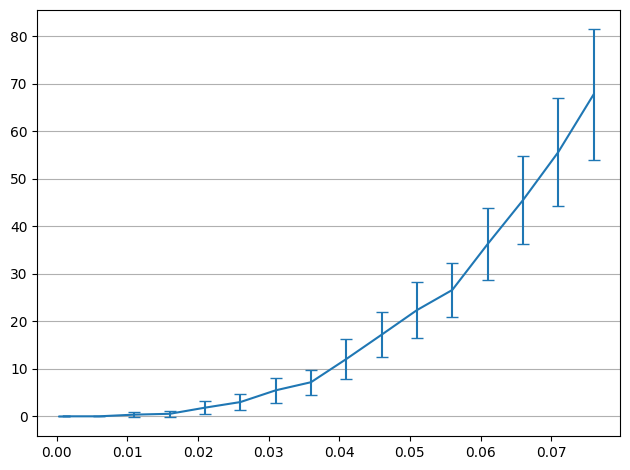

In [23]:
# Generate plot with error bars for number of triangles.
import matplotlib.pyplot as plt

x = [[sum(nx.triangles(g).values())/3 for g in G_test[i]] for i in range(len(p))]
temp = [np.asarray(x[i]) for i in range(len(p))]
mean = [np.mean(temp[i]) for i in range(len(p))]
std = [np.std(temp[i]) for i in range(len(p))]
fig, ax = plt.subplots()
ax.errorbar(p, mean, yerr=std,capsize=4)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show()

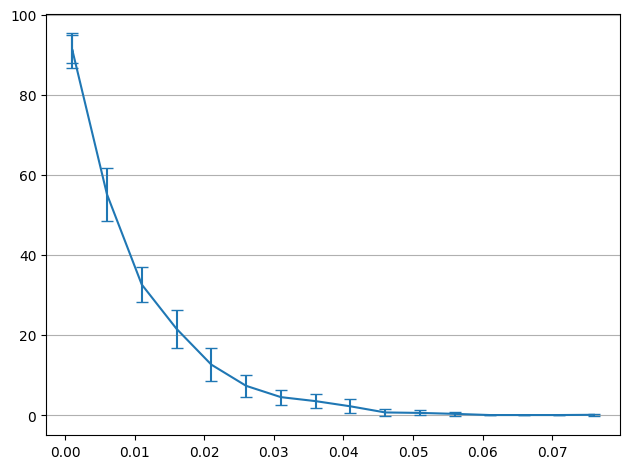

In [64]:
# Generate plot with error bars for number of isolated nodes.
import matplotlib.pyplot as plt
def f(g):
    gd = g.degree()
    acc = 0
    for i in list(g.nodes):
        if gd[i] == 0:
            acc+=1
    return acc
x = [[f(g) for g in G_test[i]] for i in range(len(p))]
temp = [np.asarray(x[i]) for i in range(len(p))]
mean = [np.mean(temp[i]) for i in range(len(p))]
std = [np.std(temp[i]) for i in range(len(p))]
fig, ax = plt.subplots()
ax.errorbar(p, mean, yerr=std,capsize=4)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show()

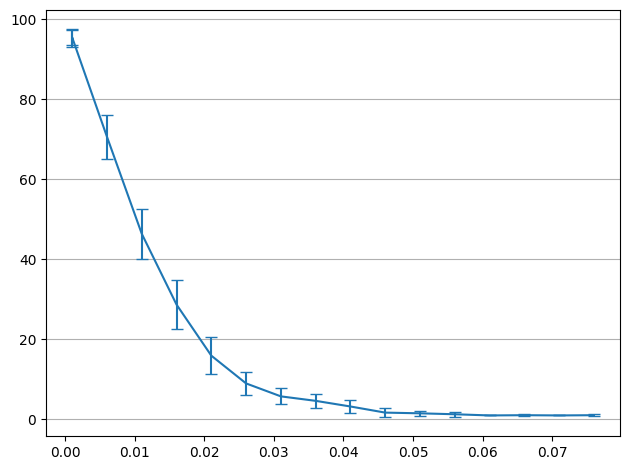

In [47]:
# Generate plot with error bars for number of connected components.
import matplotlib.pyplot as plt

x = [[len(list(nx.connected_components(g))) for g in G_test[i]] for i in range(len(p))]
temp = [np.asarray(x[i]) for i in range(len(p))]
mean = [np.mean(temp[i]) for i in range(len(p))]
std = [np.std(temp[i]) for i in range(len(p))]
fig, ax = plt.subplots()
ax.errorbar(p, mean, yerr=std,capsize=4)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show()

# Real world network

## Graph statistics (10pts)

In the same folder we provide a real-world social network dataset saved as edgelist format named "fb-pages-food.edges". Each line in this file has the format of "node1,node2" that represents an edge connecting node1 and node2. An edgelist file can be loaded as nx.Graph directly using nx.read_edgelist() like the following.

In [84]:
G = nx.read_edgelist("fb-pages-food.edges", delimiter=',')

How many nodes and edges are there in this graph? Also report the number of triangles, number of isolated nodes, and number of connected components in this graph.

In [85]:
# Report the graph statistics.
node_num = len(list(G.nodes))
edge_num = G.number_of_edges()
tri_num = sum(nx.triangles(G).values())/3
isol_num = f(G) # helperfunction I made above
connectcomp_num = len(list(nx.connected_components(G)))
print('node number: ', node_num,
      '\nedge number: ', edge_num ,
      '\ntriangle number: ', tri_num,
      '\nisolated node number: ',isol_num,
      '\nnumber of connected Component: ', connectcomp_num)

node number:  620 
edge number:  2102 
triangle number:  2935.0 
isolated node number:  0 
number of connected Component:  1


In the next cell, plot a histogram of the node degrees in this graph with bins=15.

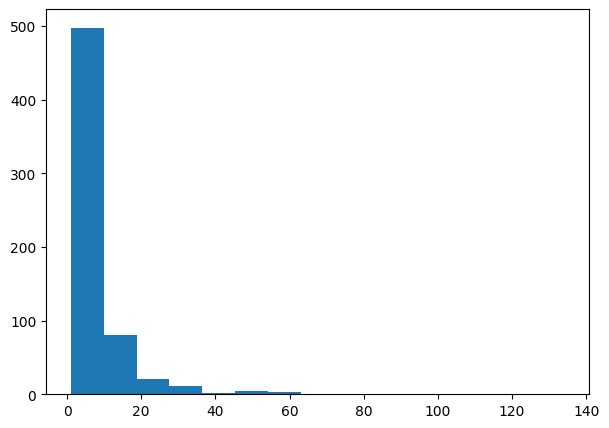

In [109]:
temp = [i[1] for i in list(G.degree)]
fig, ax = plt.subplots(figsize =(7, 5))
ax.hist(temp, bins = 15)
plt.show()

## Try to fit the data with G(n,p) (10pts)

If we want to fit the graph with G(n,p) model, i.e., find a G(n,p) model whose expected number of edges equals to number of edge in this graph, How should we set p to get m edges in expectation? 

In [79]:
# caluclate and print the value of p.
# expect number of edge =  nC2 * p = edge_num -> p = edge-num/nC2
p = edge_num/(node_num*(node_num-1)/2)
p

0.0109541925061233

Now use the p value you calculated and sample 10 graphs from G(n,p). Report the same graph statistics in average.

In [91]:
G_sample = [nx.erdos_renyi_graph(node_num, p) for i in range(10)]
node_num_sample = np.asarray([len(list(sample.nodes)) for sample in G_sample]).mean()
edge_num_sample = np.asarray([sample.number_of_edges() for sample in G_sample]).mean()
tri_num_sample = np.asarray([sum(nx.triangles(sample).values())/3 for sample in G_sample]).mean()
isol_num_sample = np.asarray([f(sample) for sample in G_sample]).mean() # f(sample) is the helperfunction I made above
connectcomp_num_sample = np.asarray([len(list(nx.connected_components(sample))) for sample in G_sample]).mean()

print('node number: ', node_num_sample,
      '\nedge number: ', edge_num_sample,
      '\ntriangle number: ', tri_num_sample,
      '\nisolated node number: ',isol_num_sample,
      '\nnumber of connected Component: ', connectcomp_num_sample)

node number:  620.0 
edge number:  2079.9 
triangle number:  49.8 
isolated node number:  0.8 
number of connected Component:  1.8


Plot the histogram of node degrees for one random graph you generated with bins=15, what's the difference between the node degree sequences of the real graph and the random graph?

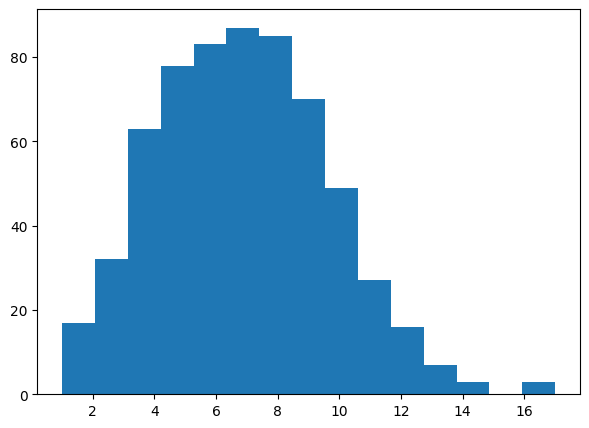

In [97]:
temp = [i[1] for i in list(G_sample[6].degree)]
fig, ax = plt.subplots(figsize =(7, 5))
ax.hist(temp, bins = 15)
plt.show()

The random graph has degree number with distribution similar to a normal distribution, while the real graph has most of its degree number of 2. Which is highly skewed.

## A random graph model that fits the degree sequence (10pts)

Given a sequence of expected degrees $(d_1,d_2\dots d_n)$ of length n, we generate a graph with n nodes, and assigns an edge between node $u$ and node $v$ with probability $$p_{uv}={d_ud_v\over \sum_k d_k}$$.

This model is known as the Chung-Lu model and is implemented in the networkx library. To generate a graph from this model, simply use the function `nx.expected_degree_graph(node_degree_list, selfloops=False)`.

To compare the generated graph with a real social network, pass the degree sequence of the real network into this model and generate 10 samples. Then plot the degree histogram of the generated graphs and compare it with the original graph. Additionally, report the same graph statistics for the generated graphs and compare them with the original graph. What observations can we make from this comparison?

In [119]:
node_degree_list = [i[1] for i in list(G.degree)]
g_temp = [nx.expected_degree_graph(node_degree_list, selfloops=False) for i in range(10)]

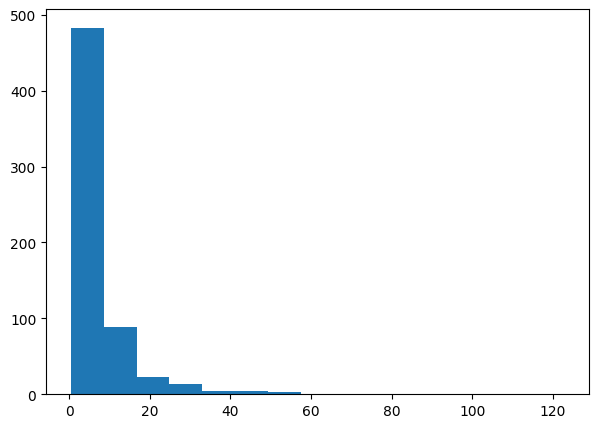

In [132]:
# plot degree 
temp = np.asarray([np.asarray([i[1] for i in list(sample.degree)]) for sample in g_temp])
temp= np.transpose(temp)
temp = [t.mean() for t in temp]
fig, ax = plt.subplots(figsize =(7, 5))
ax.hist(temp, bins = 15)
plt.show()

In [120]:
#report graphs statistic
node_num_sample = np.asarray([len(list(sample.nodes)) for sample in g_temp]).mean()
edge_num_sample = np.asarray([sample.number_of_edges() for sample in g_temp]).mean()
tri_num_sample = np.asarray([sum(nx.triangles(sample).values())/3 for sample in g_temp]).mean()
isol_num_sample = np.asarray([f(sample) for sample in g_temp]).mean() # f(sample) is the helperfunction I made above
connectcomp_num_sample = np.asarray([len(list(nx.connected_components(sample))) for sample in g_temp]).mean()

print('node number: ', node_num_sample,
      '\nedge number: ', edge_num_sample,
      '\ntriangle number: ', tri_num_sample,
      '\nisolated node number: ',isol_num_sample,
      '\nnumber of connected Component: ', connectcomp_num_sample)

node number:  620.0 
edge number:  2071.2 
triangle number:  1007.6 
isolated node number:  59.5 
number of connected Component:  61.5
